## **Definition of a problem statement and a short outline of the implementation**

The problem statement of our project is to find what are the most important attributes of tennis matches that have impact on loss or win of the match and to build relevant models in order to predict the outcome of the match on bases of previous very specific match related data. 

Implementation is to see and advise the players which part of their game they have to focus on, which part to improve and which part is their strong part.

### **Description of data acquisition / how it was collected (by you or the publisher of the data)**

The data used was found on github databases, which were posted into Slack by Roman Jurowetzki. 
Collection of data was done by the ATP statisticians from the tennis matches during season 2018.

In [0]:
#Importing libraries

import pandas as pd
from datetime import datetime
import numpy as np

In [0]:
#Importing dataset

df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv")

### **Data cleaning and Exploratory Data Analysis**

 


In [0]:
#Checking dataset

df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,Hard,NaN,A,20180101,271,105992,NaN,NaN,Ryan Harrison,R,183.0,USA,25.65,104919,NaN,NaN,Leonardo Mayer,R,188.0,ARG,30.63,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,Hard,NaN,A,20180101,272,111577,NaN,NaN,Jared Donaldson,R,NaN,USA,21.23,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,23.70,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,Hard,NaN,A,20180101,273,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,31.32,106000,7.0,NaN,Damir Dzumhur,R,172.0,BIH,25.62,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0
3,2018-M020,Brisbane,Hard,NaN,A,20180101,275,200282,NaN,WC,Alex De Minaur,R,NaN,AUS,18.87,105449,NaN,NaN,Steve Johnson,R,188.0,USA,28.02,7-6(7) 6-4,3,R32,104.0,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0
4,2018-M020,Brisbane,Hard,NaN,A,20180101,276,111581,NaN,Q,Michael Mmoh,R,NaN,USA,19.98,105643,NaN,NaN,Federico Delbonis,L,190.0,ARG,27.24,6-3 6-4,3,R32,69.0,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0


In [0]:
#Changing date to datetime

df['tourney_date'] = pd.to_datetime(df['tourney_date'], errors='coerce', format="%Y%m%d")

In [0]:
#Choosing only the Grand Slam tournaments

df_t = df[df['tourney_level'].isin(["G"])]

We decided to focus on Grand Slams only, due to several reasons. Grand Slams are the 4 biggest tournaments in tennis world, they are  most donated by points and prize money, they are the only tournaments played for 2 weeks instead of usual one week and they are the only tournaments, that are being played on 5 sets instead of normal 3 setters. 

This means, that matches are longer and every stats is higher on GS than on other tournaments (more aces, more mistakes, more everything per match), that is the logical reasoning behing choosing only Grand Slams from our data set

In [0]:
#Reseting index after cropping the dataframe

df_t.reset_index(drop=True, inplace=True)

In [0]:
df_t.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-580,Australian Open,Hard,NaN,G,2018-01-15,101,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,31.62,103607,NaN,NaN,Victor Estrella,R,173.0,DOM,37.45,6-1 6-1 6-1,5,R128,94.0,2.0,1.0,66.0,48.0,37.0,12.0,11.0,5.0,6.0,1.0,1.0,61.0,40.0,19.0,5.0,10.0,4.0,12.0,1.0,10600.0,79.0,677.0
1,2018-580,Australian Open,Hard,NaN,G,2018-01-15,102,104919,NaN,NaN,Leonardo Mayer,R,188.0,ARG,30.67,111797,NaN,NaN,Nicolas Jarry,R,NaN,CHI,22.26,6-2 7-6(1) 6-3,5,R128,115.0,12.0,1.0,66.0,46.0,46.0,14.0,14.0,0.0,0.0,10.0,1.0,123.0,74.0,50.0,20.0,15.0,12.0,16.0,52.0,929.0,101.0,550.0
2,2018-580,Australian Open,Hard,NaN,G,2018-01-15,103,105357,NaN,NaN,John Millman,R,183.0,AUS,28.59,106432,NaN,NaN,Borna Coric,R,NaN,CRO,21.17,7-5 6-4 6-1,5,R128,139.0,10.0,2.0,108.0,69.0,51.0,17.0,15.0,5.0,7.0,2.0,4.0,79.0,48.0,27.0,14.0,14.0,2.0,8.0,122.0,476.0,46.0,1036.0
3,2018-580,Australian Open,Hard,NaN,G,2018-01-15,104,106000,28.0,NaN,Damir Dzumhur,R,172.0,BIH,25.66,103893,NaN,NaN,Paolo Lorenzi,R,183.0,ITA,36.08,3-6 2-6 7-6(5) 6-2 6-4,5,R128,225.0,3.0,5.0,127.0,74.0,58.0,27.0,23.0,4.0,9.0,18.0,5.0,179.0,92.0,68.0,41.0,24.0,8.0,13.0,30.0,1391.0,44.0,1120.0
4,2018-580,Australian Open,Hard,NaN,G,2018-01-15,105,106043,24.0,NaN,Diego Sebastian Schwartzman,R,170.0,ARG,25.42,105583,NaN,NaN,Dusan Lajovic,R,180.0,SRB,27.55,2-6 6-3 5-7 6-4 11-9,5,R128,239.0,14.0,7.0,189.0,109.0,68.0,40.0,30.0,14.0,25.0,6.0,8.0,183.0,126.0,78.0,24.0,29.0,13.0,24.0,26.0,1675.0,75.0,687.0


In [0]:
#How many times did a lower rank win in a match against a higher rank
#we answer this by creationg a boolean series and then using the sum function to see the number of times the loser_rank was higher than the winner_rank
#Keep in mind than in this case the 23 rank for example is higher than the 24th rank
w_lowrank = df_t['winner_rank'] > df_t['loser_rank']
print(w_lowrank.head())
print(w_lowrank.sum())

w_highrank = df_t['winner_rank'] < df_t['loser_rank']
print(w_highrank.sum())

0    False
1    False
2     True
3    False
4    False
dtype: bool
146
362


We were wondering how many times did the lower ranked player beated the higher ranked. We can see that in 362 the favourite won the match, but in 146 cases a player who was ranked lower did manage to beat his higher ranked opponent 

In [0]:
#Creating the winner dataframe 

df_w = df_t.drop(["tourney_id", "draw_size", "match_num", "winner_id", "winner_seed", 
                  "winner_entry", "loser_id", "loser_entry", "loser_seed", "best_of", 
                  "score", "winner_rank_points", "loser_rank_points", "loser_name", "loser_hand", "loser_ht", "loser_ioc", 
                  "loser_age", "l_ace", "l_bpFaced", "loser_rank", "l_svpt", "l_df", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved"], axis=1)

To create winner data frame we delete the loser stats and other unnecessary columns and information that have no impact to what we are focusing on. For example tournament ID has no affect on our predictions etc.

In [0]:
#Renaming the columns in the winner DF in order to concatenante it with the loser DF 

df_w.rename(columns={'winner_name':'name'}, inplace=True)
df_w.rename(columns={'winner_hand':'hand'}, inplace=True)
df_w.rename(columns={'winner_ht':'height'}, inplace=True)
df_w.rename(columns={'winner_ioc':'country'}, inplace=True)
df_w.rename(columns={'winner_age':'age'}, inplace=True)
df_w.rename(columns={'w_ace':'ace'}, inplace=True)
df_w.rename(columns={'w_df':'df'}, inplace=True)
df_w.rename(columns={'w_svpt':'svpt'}, inplace=True)
df_w.rename(columns={'w_1stIn':'1stIn'}, inplace=True)
df_w.rename(columns={'w_1stWon':'1stWon'}, inplace=True)
df_w.rename(columns={'w_2ndWon':'2ndWon'}, inplace=True)
df_w.rename(columns={'w_SvGms':'SvGms'}, inplace=True)
df_w.rename(columns={'w_bpSaved':'bpSaved'}, inplace=True)
df_w.rename(columns={'w_bpFaced':'bpFaced'}, inplace=True)
df_w.rename(columns={'winner_rank':'rank'}, inplace=True)

In [0]:
#Adding new column outcome with result "Won"

df_w["outcome"] = "Won"

In [0]:
#Calculating the mean height of the winners

print("The mean height of the winners was" ,df_w["height"].mean(), "cm")

#Calculating the median height of the winners

print("The median height of the winners was" ,df_w["height"].median(), "cm")

#Calculating the standard deviation of height of the winners

print("The standard deviation of height of the winners was", df_w["height"].std(), "cm")

The mean height of the winners was 187.8575197889182 cm
The median height of the winners was 188.0 cm
The standard deviation of height of the winners was 8.63092539634997 cm


In [0]:
#Calculating the mean of how many times did the winners lose their serve

df_breaks_w = df_w["bpFaced"] - df_w["bpSaved"]

print(df_breaks_w.mean())

#Calculating the median of how many times did the winners lose their serve

print(df_breaks_w.median())

#Calculating standard deviation

print(df_breaks_w.std())

2.1929133858267718
2.0
1.9394658001924956


This is one of the most important statistics in tennis world. One of the main objectives in the match is to hold your serve and try to break your opponents serve. It means, each game you are serving and you lose that game(note not match, but game is one of the small units of the whole match) you lost your serve and your opponent "broke" you. The numbers from BreakPointsFaced tell us how many times was the player facing break of his serve and BreakPointsSaved means how many times of that he managed to win that point. The difference between them is the stats of how many times they lost their service. 

We can see the mean and median of how many times did the winners lose their service. 

The number is incredible considering, that the Grand Slams are played on 5 sets, so the number of times you are serving each game in this match can vary from 10 to 25, one game can last from 4 to cca 10points, therefore if we multiply 25games with 10times serving, thats serving 250times. To be able to lose your serving game only 2 times on average and hold it for the rest plus to break your opponent in order to win the match is just incredible stat and we see how good the players on the best level are. Thats why we have the mean and median of difference between bpFaced and bpSaved

In [0]:
#Creating the loser dataframe 

df_l = df_t.drop(["tourney_id", "draw_size", "match_num", "winner_id", "winner_seed", 
                  "winner_entry", "loser_id", "loser_entry", "loser_seed", "best_of", 
                  "score", "winner_rank_points", "loser_rank_points", "winner_name", "winner_hand", "winner_ht", "winner_ioc", 
                  "winner_age", "w_ace", "w_bpFaced", "winner_rank", "w_svpt", "w_1stIn", "w_df", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved"], axis=1)

To create loser data frame we delete the loser stats and other unnecessary columns and information that have no impact to what we are focusing on. For example tournament ID has no affect on our predictions etc.

In [0]:
#Renaming the columns in the loser DF in order to concatenante it with the winner DF 

df_l.rename(columns={'loser_name':'name'}, inplace=True)
df_l.rename(columns={'loser_hand':'hand'}, inplace=True)
df_l.rename(columns={'loser_ht':'height'}, inplace=True)
df_l.rename(columns={'loser_ioc':'country'}, inplace=True)
df_l.rename(columns={'loser_age':'age'}, inplace=True)
df_l.rename(columns={'l_ace':'ace'}, inplace=True)
df_l.rename(columns={'l_df':'df'}, inplace=True)
df_l.rename(columns={'l_svpt':'svpt'}, inplace=True)
df_l.rename(columns={'l_1stIn':'1stIn'}, inplace=True)
df_l.rename(columns={'l_1stWon':'1stWon'}, inplace=True)
df_l.rename(columns={'l_2ndWon':'2ndWon'}, inplace=True)
df_l.rename(columns={'l_SvGms':'SvGms'}, inplace=True)
df_l.rename(columns={'l_bpSaved':'bpSaved'}, inplace=True)
df_l.rename(columns={'l_bpFaced':'bpFaced'}, inplace=True)
df_l.rename(columns={'loser_rank':'rank'}, inplace=True)

In [0]:
#Adding new column outcome with result "Lost"

df_l["outcome"] = "Lost"

In [0]:
#Calculating the mean height of the losers

print("The mean height of the losers was", df_l["height"].mean(), "cm")

#Calculating the median height of the losers

print("The mean height of the losers was", df_l["height"].median(), "cm")

#Calculating the standard deviation of height of the losers

print("The standard deviation of height of the losers was", df_l["height"].std(), "cm")

The mean height of the losers was 186.131498470948 cm
The mean height of the losers was 185.0 cm
The standard deviation of height of the losers was 7.432177092659599 cm


Comparing this with the winner stats, we can see that both on average and in the median, the players who won was taller than the players who lost, but both of the results are in the area of standard deviation, therefore we can see there might be almost no connection between player's height and the outcome of the match.

In [0]:
#Calculating the mean of how many times did the winners lose their service

df_breaks_l = df_l["bpFaced"] - df_l["bpSaved"]

print(df_breaks_l.mean())

#Calculating the median of how many times did the winners lose their service

print(df_breaks_l.median())

#Calculating standard deviation

print(df_breaks_l.std())

5.206692913385827
5.0
1.9088175156045393


The same as goes for the losing of the serve for winners. Its no surprise, that losers lost more serves than winners, since, that is the point of the game. A person who struggles with his serve, should really work on it, if they want to succeed on Grand Slams level

In [0]:
#Concatenating the two dataframes winners and losers

df_c = pd.concat([df_w, df_l])
df_c.reset_index(drop=True, inplace=True)
df_c.head()

,tourney_name,surface,tourney_level,tourney_date,name,hand,height,country,age,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,outcome
0,Australian Open,Hard,G,2018-01-15,Rafael Nadal,L,185.0,ESP,31.62,R128,94.0,2.0,1.0,66.0,48.0,37.0,12.0,11.0,5.0,6.0,1.0,Won
1,Australian Open,Hard,G,2018-01-15,Leonardo Mayer,R,188.0,ARG,30.67,R128,115.0,12.0,1.0,66.0,46.0,46.0,14.0,14.0,0.0,0.0,52.0,Won
2,Australian Open,Hard,G,2018-01-15,John Millman,R,183.0,AUS,28.59,R128,139.0,10.0,2.0,108.0,69.0,51.0,17.0,15.0,5.0,7.0,122.0,Won
3,Australian Open,Hard,G,2018-01-15,Damir Dzumhur,R,172.0,BIH,25.66,R128,225.0,3.0,5.0,127.0,74.0,58.0,27.0,23.0,4.0,9.0,30.0,Won
4,Australian Open,Hard,G,2018-01-15,Diego Sebastian Schwartzman,R,170.0,ARG,25.42,R128,239.0,14.0,7.0,189.0,109.0,68.0,40.0,30.0,14.0,25.0,26.0,Won


By this we created one dataframe, where each line is one loser or winner (unlike in the original), because now we can see wether the stats of the match were about a won or lost match. 

In [0]:
#Checking the dataset

df_c.head()

,tourney_name,surface,tourney_level,tourney_date,name,hand,height,country,age,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,outcome
0,Australian Open,Hard,G,2018-01-15,Rafael Nadal,L,185.0,ESP,31.62,R128,94.0,2.0,1.0,66.0,48.0,37.0,12.0,11.0,5.0,6.0,1.0,Won
1,Australian Open,Hard,G,2018-01-15,Leonardo Mayer,R,188.0,ARG,30.67,R128,115.0,12.0,1.0,66.0,46.0,46.0,14.0,14.0,0.0,0.0,52.0,Won
2,Australian Open,Hard,G,2018-01-15,John Millman,R,183.0,AUS,28.59,R128,139.0,10.0,2.0,108.0,69.0,51.0,17.0,15.0,5.0,7.0,122.0,Won
3,Australian Open,Hard,G,2018-01-15,Damir Dzumhur,R,172.0,BIH,25.66,R128,225.0,3.0,5.0,127.0,74.0,58.0,27.0,23.0,4.0,9.0,30.0,Won
4,Australian Open,Hard,G,2018-01-15,Diego Sebastian Schwartzman,R,170.0,ARG,25.42,R128,239.0,14.0,7.0,189.0,109.0,68.0,40.0,30.0,14.0,25.0,26.0,Won


In [0]:
#Replaceing the object R and L with integer 1 and 0 

df_ml = df_c.replace({'hand': {"R": 1, "L": 0, "U" : 1}})

There was 20 times letter "U" we expected - undefined, but it only repeated 4 times, so it was only 4 players. At this point we just have to take a risk and assume they are right handed, as majority of players, so we label them as right handed

In [0]:
df_ml["hand"] = df_ml["hand"].astype(int)


In [0]:
df_ml["age"] = df_ml["age"].astype(int)

In [0]:
#Dropping the missing values, in this case we were missing many of the same stats from the same 4 matches

df_drop = df_ml.dropna(subset=['ace'])

When we ran the info function on that dataset, we saw that exactly 8 values are missing in 10different variables. It was obvious, that those 8 missing values come from the same matches. Because each row is now only "half" of the match stats, 8 rows = 4 matches. Therefore we tried to drop all the rows where ace is missing (ace was just random pick of one of the data missing) and we immediately saw, that all of the other rows with missing 8 data were dropped too

In [0]:
df_drop.shape

(1016, 22)

In [0]:
#The rest of missing data was minutes (lenght of match) and height of the players, therefore we decided to fill it with mean

df_f = df_drop.fillna(df_drop.mean())

In this case we decided not to drop other rows, because there was quite a lot of them missing, but instead to fill them with mean and the height. 

In [0]:
df_f.head()

,tourney_name,surface,tourney_level,tourney_date,name,hand,height,country,age,round,minutes,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,outcome
0,Australian Open,Hard,G,2018-01-15,Rafael Nadal,0,185.0,ESP,31,R128,94.0,2.0,1.0,66.0,48.0,37.0,12.0,11.0,5.0,6.0,1.0,Won
1,Australian Open,Hard,G,2018-01-15,Leonardo Mayer,1,188.0,ARG,30,R128,115.0,12.0,1.0,66.0,46.0,46.0,14.0,14.0,0.0,0.0,52.0,Won
2,Australian Open,Hard,G,2018-01-15,John Millman,1,183.0,AUS,28,R128,139.0,10.0,2.0,108.0,69.0,51.0,17.0,15.0,5.0,7.0,122.0,Won
3,Australian Open,Hard,G,2018-01-15,Damir Dzumhur,1,172.0,BIH,25,R128,225.0,3.0,5.0,127.0,74.0,58.0,27.0,23.0,4.0,9.0,30.0,Won
4,Australian Open,Hard,G,2018-01-15,Diego Sebastian Schwartzman,1,170.0,ARG,25,R128,239.0,14.0,7.0,189.0,109.0,68.0,40.0,30.0,14.0,25.0,26.0,Won


In [0]:
#Making sure there is 0 missing values

print(df_f.isnull().sum())

tourney_name     0
surface          0
tourney_level    0
tourney_date     0
name             0
hand             0
height           0
country          0
age              0
round            0
minutes          0
ace              0
df               0
svpt             0
1stIn            0
1stWon           0
2ndWon           0
SvGms            0
bpSaved          0
bpFaced          0
rank             0
outcome          0
dtype: int64


In [0]:
#Loading and instantiating the LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_f["outcome"]=encoder.fit_transform(df_f["outcome"])
import seaborn as sns
sns.set(style="darkgrid")

We use the Label-encoder function to transform all labels into numerical values to make it readable for machine learning tasks. For example, the outcome column has the labels w and l which aren’t numerical, Label-encoder ensures that the numerical representation is 0 and 1 instead of won and lost.

[Text(0.5, 0, 'hand'),
 Text(1.5, 0, 'height'),
 Text(2.5, 0, 'age'),
 Text(3.5, 0, 'minutes'),
 Text(4.5, 0, 'ace'),
 Text(5.5, 0, 'df'),
 Text(6.5, 0, 'svpt'),
 Text(7.5, 0, '1stIn'),
 Text(8.5, 0, '1stWon'),
 Text(9.5, 0, '2ndWon'),
 Text(10.5, 0, 'SvGms'),
 Text(11.5, 0, 'bpSaved'),
 Text(12.5, 0, 'bpFaced'),
 Text(13.5, 0, 'rank'),
 Text(14.5, 0, 'outcome')]

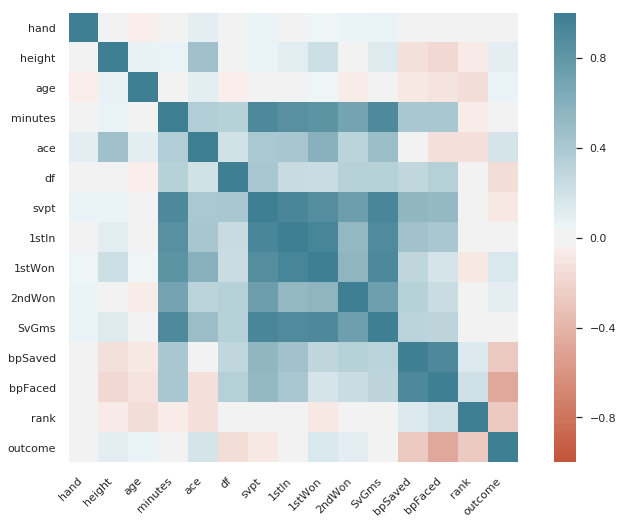

In [0]:
#correlation matrix in order to see to what degree the variables are correlated

corr = df_f.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

A very specific describtion of this matrix can be found in Stakeholder report

In [0]:
#correlation of height and ace 

df_f['height'].corr(df_f['ace'])

0.46109788662862905

A quite surprising statistics, that there is only 46% correlation between the player's height and his ability to shoot aces

In [0]:
#correlation of outcome and height

df_f['outcome'].corr(df_f['height'])

0.08798447452934605

Even thought we saw earlier, that on average, the players who won were taller than the losers, this correlation confirms the fact, that the height is not such an indicator in regards of the outcome of the match

In [0]:
#correlation

df_f['height'].corr(df_f['df'])

0.02114618747540803

Df - doublefault - means if you miss two serves in the row and opponent gains one point on your serve. There is not a negative correlation between players height and double faults made, which means, that even the shorter players can serve well and can relly on their serve

In [0]:
!pip install pandas_profiling

### **Individual statistics for three best players**

In this part we focus on top three players of the last decade and we are looking at their performances and statistics from the Grand Slams from the last year. On each player was computed the same calculations. 

Note that Djokovic and Nadal both participated in more matches at GS, Federer did start only 3 of them and lost earlier, which means the statistics for him might be a bit biased in regards to his two fellow opponents, due to less matches played

In all of the three players we can see that the correlation regarding their serve is very high. This is no surprise, as most of the tennis game focuses on how good the player is serving. If they are serving good - they win lots of points and have high chance of winning the match

Next we plot the scatter chart for all 3 of them, with how many times they managed to hit the first serve inside the court and how many times of them they won the point after the 1st serve

Then we calculate the mean of how many points they win after the first serve. For Djokovic and Nadal it is around 75% and Federer is 84%, this is again incredible stats for the living tennis gods, this means that on average 3 out of 4 times they start serving and hit the first serve they also win the point. 

As the last statistics we calculate how many times on average they lose their serve, for Djokovic and Nadal its 2 whereas for Federer its only 1 lose of the serve per match, even thought he played only 3 tournaments, it is still incredible that he managed to lose servise on average only once per match. This shows the mental endurance of these three tennis legends.

**Djokovic**

In [0]:
#Creating dataframe only for Djokovic

df_D = df_f[df_f['name'].isin(["Novak Djokovic"])]


In [0]:
#Novak Djokovic - most important stats from pandas profiling but we hid it because it takes much space

#1stIn is highly correlated with svpt (ρ = 0.97173) 
#1stWon is highly correlated with 1stIn (ρ = 0.95482) 
#SvGms is highly correlated with 1stWon (ρ = 0.94757) 

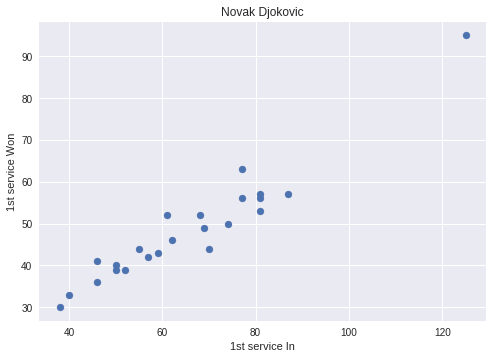

In [0]:
#Scatter plot of the first service in and the first service won for each player

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.style.use('seaborn')

x = df_D["1stIn"]
y = df_D["1stWon"]

plt.xlabel("1st service In")
plt.ylabel("1st service Won")
plt.title("Novak Djokovic")

plt.scatter(x, y)
plt.show()

In [0]:
#How many times on average did Novak Djokovic won the point after he hit the first service

df_Dmean= (df_D['1stWon']/df_D['1stIn']).mean()
print(df_Dmean)

0.7507628035639868


In [0]:
#How many times did on average Novak Djokovic lost his service

df_breaks_D = df_D["bpFaced"] - df_D["bpSaved"]

df_breaks_D.mean()

1.9130434782608696

**Nadal**

In [0]:
#Creating dataframe only for Nadal

df_N = df_f[df_f['name'].isin(["Rafael Nadal"])]


In [0]:
#Rafael Nadal most important stats from pandas profiling but we hid it because it takes much space

#1stIn is highly correlated with svpt (ρ = 0.98113) Rejected
#1stWon is highly correlated with 1stIn (ρ = 0.97898) Rejected
#SvGms is highly correlated with 1stWon (ρ = 0.93079) Rejected

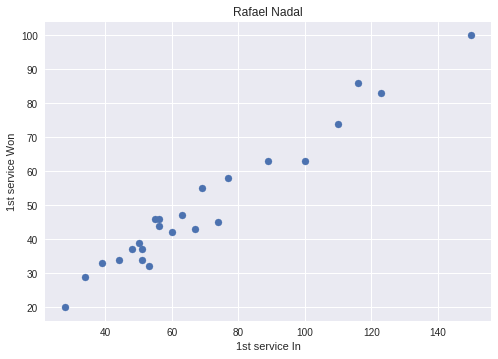

In [0]:
#Scatter plot of the first service in and the first service won for each player

matplotlib.style.use('seaborn')

x = df_N["1stIn"]
y = df_N["1stWon"]

plt.xlabel("1st service In")
plt.ylabel("1st service Won")
plt.title("Rafael Nadal")

plt.scatter(x, y)
plt.show()

In [0]:
#How many times on average did Rafael Nadal won the point after he hit the first service

df_Nmean= (df_N['1stWon']/df_N['1stIn']).mean()
print(df_Nmean)

0.7298371896588195


In [0]:
#How many times did on average Rafael Nadal lost his service

df_breaks_N = df_N["bpFaced"] - df_N["bpSaved"]

df_breaks_N.mean()

2.1666666666666665

**Federer**

In [0]:
#Creating dataframe only for Federer

df_F = df_f[df_f['name'].isin(["Roger Federer"])]

In [0]:
#Roger Federer most important stats from pandas profiling but we hid it because it takes much space

#1stIn is highly correlated with svpt (ρ = 0.93861) 
#1stWon is highly correlated with 1stIn (ρ = 0.99074) 
#SvGms is highly correlated with 1stWon (ρ = 0.96477) 

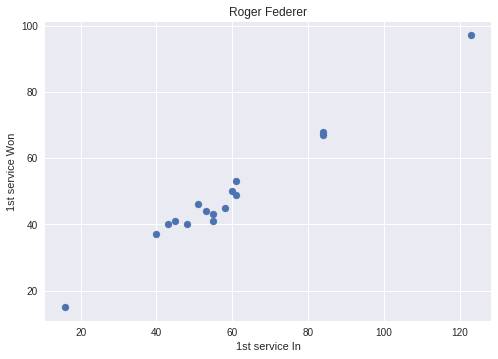

In [0]:
#Scatter plot of the first service in and the first service won for each player

matplotlib.style.use('seaborn')

x = df_F["1stIn"]
y = df_F["1stWon"]

plt.xlabel("1st service In")
plt.ylabel("1st service Won")
plt.title("Roger Federer")

plt.scatter(x, y)
plt.show()

In [0]:
#How many times on average did Roger Federer won the point after he hit the first service

df_Fmean= (df_F['1stWon']/df_F['1stIn']).mean()
print(df_Fmean)

0.8421054054110794


In [0]:
#How many times did on average Roger Federer lost his service (note: Federer played only 2 tournaments out of 4)

df_breaks_F = df_F["bpFaced"] - df_F["bpSaved"]

df_breaks_F.mean()

1.0

**We have finished with EDA and can start ML preparation**

---



In [0]:
#Choosing the range of variables to use for Unsupervised ML 

df_u_ml = df_f.drop(["tourney_name", "surface", "tourney_level", "tourney_date", "name", "country", 
              "round", "minutes", "rank"], axis=1)

In [0]:
#Scaling the variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_u_ml)

We scale the date to get independent variables or features of our data. Our goal with preforming scaling of data is to deal with highly varying values and get them into a fixed range of independent variables of features.

## **Unsupervised Machine Learning**

PCA is a dimension reduction which finds patterns in data and uses the patterns to reexpress it in a
compressed form. In this case we will reduce the data to 4 dimensions. This will help us understand our data
better. Dimensionality reduction means that only the components with the highest variance are kept while the
others are discarded. However the overall relationship between the data point is preserved.

**PCA Analysis**

In [0]:
#PCA analysis with 4 components and instantiating the fit tranfrom function for the scaled data 

from sklearn.decomposition import PCA

pca = PCA(n_components=4)

df_pca = pca.fit_transform(df_scaled)

Before taking any other steps we will normalize the numerical variables. The PCA requires scaling because it
attempts to get the feature with the maximum variance. Scaling helps weight all features equaly as it substracts
the sample mean from each value and divides it by the standard deviation. We do this through the use of
StandardScaler

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression




In [0]:
#Showing how much of the variance ration do 4 component show

pca.explained_variance_ratio_.sum()

0.7345606210039763

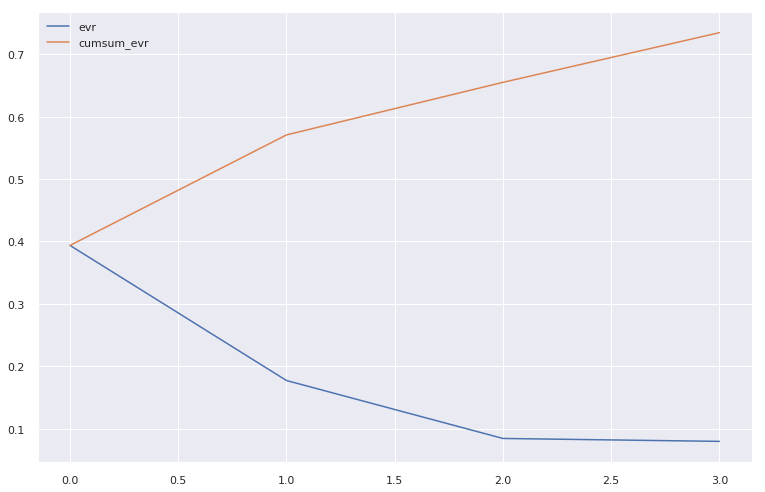

In [0]:
#Visualizing the model

plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()


sns.set(rc={'figure.figsize':(12.8,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

The data show that with 4 components the data explains around 73% of the data which also can be seen in the explained variance ration above. For example two components explain only 57%, which is quite low, but if we chose more components, we would only experience a small increase in the coverage of data, therefore 4 components is good choice this time

**KMean clusters**

The KMeans algorithm tries to divide the data into an n numebr of groups based on their variance, and it
minimizes the inertia. Inertia measures how internally coherent the clusters are. For each k value, we will initialise k-means and use the inertia attribute to identify the sum of
squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends
to zero

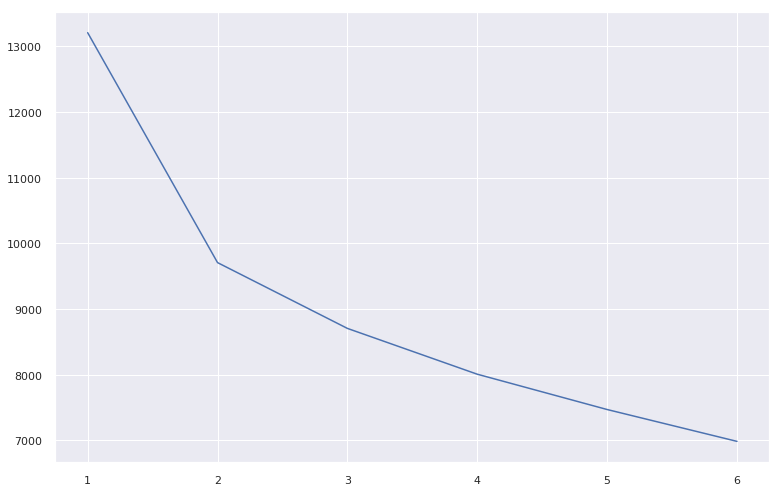

In [0]:
#Visualizing and using the elbow method to choose the number of clusters, where the inertia is low

import seaborn as sns
from sklearn.cluster import KMeans

inertia = []
for i in range(1,7):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(df_scaled).inertia_)

sns.lineplot(y = inertia, x = range(1,7))

The line is descending from the third cluster and therefor we see 3 clusters as the most pragmatic number.

In [0]:
from sklearn.decomposition import PCA

cluster = KMeans(n_clusters=3)

cluster.fit(df_u_ml)

print(cluster.score)



<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>


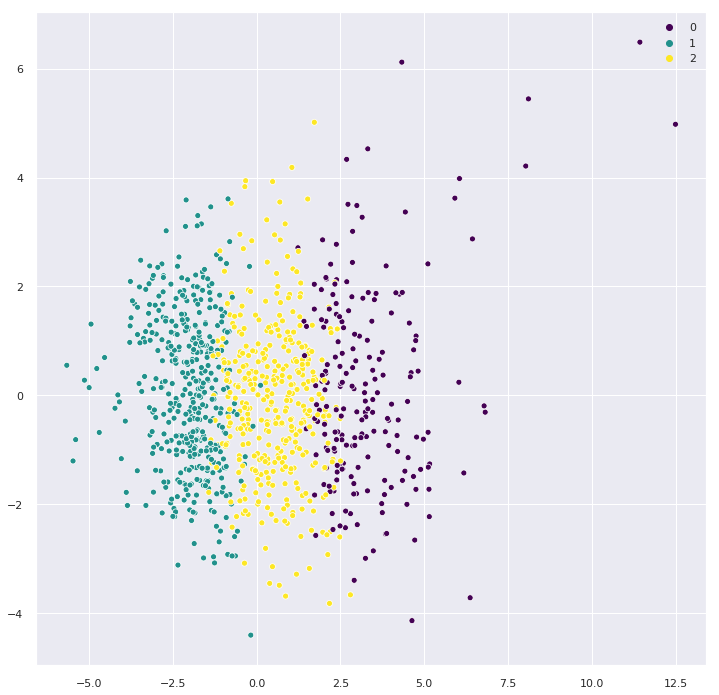

In [0]:
#Visualizing how the values in the clusters are distributed

plt.figure(figsize=(12,12))
g = sns.scatterplot(df_pca[:,0], df_pca[:,1], hue=cluster.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()

We have made three clusters, as can be seen in the visualization and we check if the clusters are separated by 1st serve won using the crosstab function. The algorithm clearly separates the third cluster from the other two based on number of 1st serve won, as cluster 3 contains the highest numeric values  in the column.

In [0]:
#Checking whether the clusters are sorted by the 1st serve in. 

labels = cluster.fit_predict(df_pca)
Height = df_u_ml["1stIn"]
df_u_ml = pd.DataFrame({'1stIn': Height,'labels': labels})
ct = pd.crosstab(df_u_ml['1stIn'], df_u_ml['labels'])
print(ct)

labels  0  1   2
1stIn           
16.0    0  0   1
17.0    0  1   0
20.0    0  1   1
21.0    0  0   2
22.0    0  0   1
26.0    0  0   1
27.0    0  0   2
28.0    0  1   1
29.0    0  1   0
30.0    0  1   1
31.0    0  1   2
32.0    0  0   3
33.0    0  2   1
34.0    0  1   2
35.0    0  2   1
36.0    0  1   2
37.0    0  1   2
38.0    0  3   6
39.0    0  1   5
40.0    0  4   5
41.0    0  6   6
42.0    0  5   9
43.0    0  6   5
44.0    0  5   5
45.0    0  6   6
46.0    0  6  15
47.0    0  9   4
48.0    0  8  13
49.0    0  6   8
50.0    0  7  11
...    .. ..  ..
107.0   6  0   0
108.0   8  0   0
109.0   4  0   0
110.0   4  0   0
111.0   5  0   0
112.0   1  0   0
113.0   4  0   0
114.0   1  0   0
115.0   1  0   0
116.0   5  0   0
117.0   2  0   0
120.0   3  0   0
121.0   1  0   0
122.0   1  0   0
123.0   3  0   0
125.0   1  0   0
126.0   1  0   0
127.0   1  0   0
128.0   1  0   0
129.0   1  0   0
133.0   1  0   0
137.0   1  0   0
138.0   1  0   0
139.0   1  0   0
147.0   1  0   0
150.0   1  0  

## **Supervised ML**

In [0]:
#Importing the packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#Loading and instantiating the LabelEncoder

scaler = StandardScaler()
label = LabelEncoder()

In [0]:
#Creating the targer variable y and choosing independent variables X

X = df_f.drop(["outcome", "tourney_name", "surface", "tourney_level", "tourney_date", "name", "country", 
              "round", "minutes", "rank"], axis=1).values
y = df_f["outcome"].values

In [0]:
#Encoding and scaling 

y_enc = label.fit_transform(y)
X_scaled = scaler.fit_transform(X)

In [0]:
#Performing the train test split, choosing 25% as a test and 75% of the data as training data 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.25, random_state=42)

By doing this we are keeping 25% of the data hidden from the model, the model learns on the rest of the data, this case 75% and then compares it's predictions with the hidden 25% of the data. Based on how many of the correct predictions it had, it tells us the accuracy of the predictions. 

**Logistic Regression**

Before using the models on our data it is important to understand how they work and how the results should be interpreted so that we will be able to rank them.
The logistic regression model is used when dealing with a classification problem. In this case we are dealing with independent variables that are continuous in nature while the target variable is in categorical form, won or lost.  This model predicts the probability of an event happening by fitting data to a logit function. A logit is a log of odds which are a function of probability. For logistic regression logit(P) = a + bX.
In the events that we are dealing with target variables that have more than two outcomes we would use the multinomial logistic regression.

0.8307086614173228
[0.84313725 0.78431373 0.79605263 0.78947368 0.82236842]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       128
           1       0.83      0.83      0.83       126

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

(<Figure size 921.6x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74543fe6a0>)

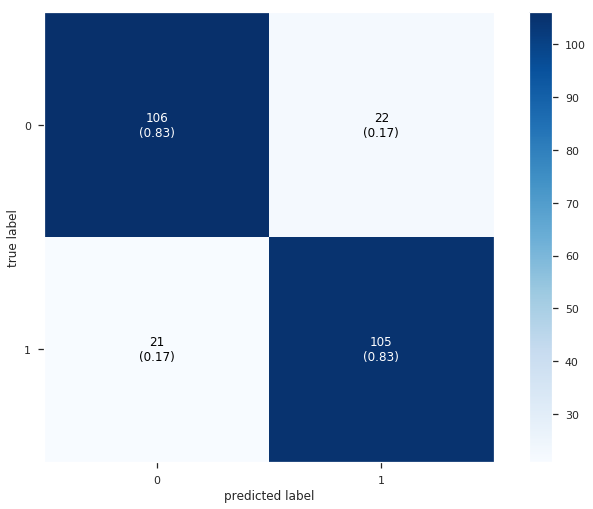

In [0]:
 # Logistic Regression Model and fitting into the training data 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

#Predicting y based on the test data 

y_pred = logreg.predict(X_test)

print(logreg.score(X_test, y_test))

#Choosing the 5 fold cross validation

scores = cross_val_score(logreg, X_train, y_train, cv = 5)
print(scores)

print(classification_report(y_test, y_pred))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

In [0]:
#Installing catboost

!pip install catboost

**CatBoost**

Catboost is a machine learning algorithm which differentiates itself from XGBoost and LightGBM by allowing users to handle the categorical values of a large dataset more quickly.  As most gradient boosting algorithm it uses decision trees as base predictors. The advantage of this model is that it uses a new schema for calculating leaf values when selecting the tree structure which reduces overfitting. The model can be used to solve regression, classification and ranking problems.

In [0]:
# We are choosing CatBoost Model

from catboost import CatBoostClassifier


model_cat = CatBoostClassifier()

model_cat.fit(X_train, y_train) 

y_pred = model_cat.predict(X_test)

#Again choosing 5 fold cross validation method

scores = cross_val_score(model_cat, X_train, y_train, cv = 5)
print(scores)

Learning rate set to 0.015514
0:	learn: 0.6878970	total: 19.4ms	remaining: 19.4s
1:	learn: 0.6829276	total: 36.7ms	remaining: 18.3s
2:	learn: 0.6775445	total: 57ms	remaining: 18.9s
3:	learn: 0.6721113	total: 76.2ms	remaining: 19s
4:	learn: 0.6669701	total: 87.1ms	remaining: 17.3s
5:	learn: 0.6609797	total: 104ms	remaining: 17.2s
6:	learn: 0.6546868	total: 116ms	remaining: 16.5s
7:	learn: 0.6502067	total: 135ms	remaining: 16.7s
8:	learn: 0.6458295	total: 151ms	remaining: 16.7s
9:	learn: 0.6411493	total: 169ms	remaining: 16.8s
10:	learn: 0.6351189	total: 188ms	remaining: 16.9s
11:	learn: 0.6313750	total: 209ms	remaining: 17.2s
12:	learn: 0.6271019	total: 228ms	remaining: 17.3s
13:	learn: 0.6235742	total: 245ms	remaining: 17.2s
14:	learn: 0.6192976	total: 264ms	remaining: 17.3s
15:	learn: 0.6167027	total: 281ms	remaining: 17.3s
16:	learn: 0.6127910	total: 297ms	remaining: 17.2s
17:	learn: 0.6086855	total: 313ms	remaining: 17.1s
18:	learn: 0.6053594	total: 330ms	remaining: 17s
19:	learn: 0

In [0]:
#The score for the Catboost model

print(model_cat.score(X_test, y_test))

0.8228346456692913


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       128
           1       0.81      0.84      0.82       126

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



(<Figure size 921.6x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7454499cc0>)

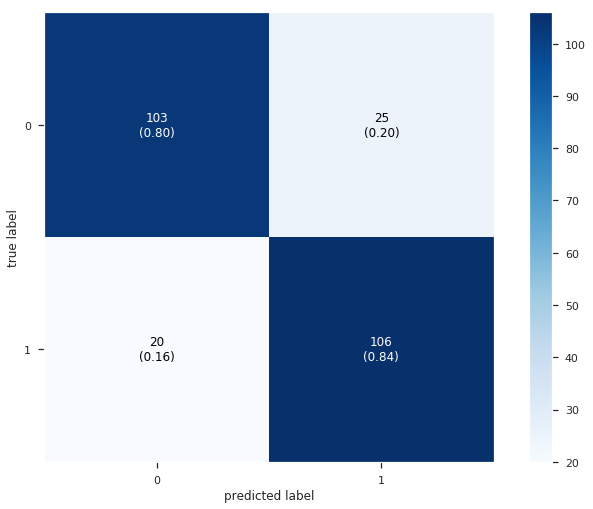

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

**Random Forest**

In this step, we use random forests, a supervised learning algorithm. A random forest is an ensemble of decision trees, using training data to learn to make predictions. Random forests use a variation of bagging whereby many independent trees are learned from the same training data. A forest typically contains several hundred trees.

[0.73202614 0.77777778 0.71710526 0.77631579 0.69078947]
0.7401574803149606
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       128
           1       0.75      0.71      0.73       126

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.74      0.74      0.74       254



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

(<Figure size 921.6x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74542a41d0>)

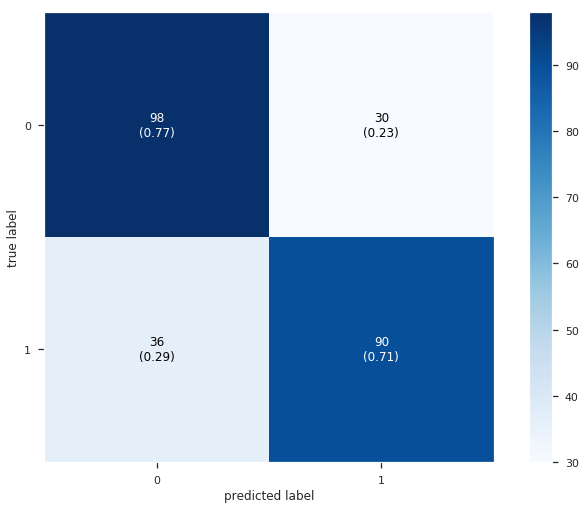

In [0]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

**Clasification report matrix**

Precision tells us how accurate the model in not labeling an instance positive when in reality it should be negative.  In other words, for all instances classified positive what percent was correct. 

Recall tells us the models ability to find all actual positives. For all the instances that were actually positive, what percent was classified correctly.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. This can be used to compare the classifier model.


Support  is the real number of occurances of the class in the used data set. In the events that the support is imbalanced we might actually be dealing with weakness in the reported scores of the classifier . This metric does not change between model and it helps in diagnosing the evaluation process.

**Conclusion of the models**

After applying the three models on the data we can now compare them and identify the model that performed the best. In the test set that was used we can see that we have 128 Losses and 126 Wins.
The Logistic Regression model has an overall accuracy of 83%. If we take a look at the five splits we can see that the 1st split has the highest accuracy. This variation in accuracy is dependent on how we split our data. The model predicts with 83% precision that the outcome of the match is a Loss when it is indeed a Loss. This is the same for predicting that the outcome is a Win. In the case of recall we get 83% for both Win and Loss. This means for example that from all the instances in which the outcome was a loss, the model was correct 83% of the time.

The CatBoost model on the other hand has a slightly lower overall accuracy, compared to Logistic regression, which is 82%.
The precision when it comes to identifying the losses is 84% which is slightly higher than the previous model. However, CatBoost did worse at prediction the winning matches.  From all the instances used, the model was 80%  of the time correct when predicting the losing outcomes and 84% correct at predicting the winning outcome.
In the confusion matrix we can see that 103 Losses and 106 Wins were correctly classified.

The Random Forest model had the poorest performance out of the models used. The precision was only 74% for losses and 78% for wins. From all the instances used, the model was 80%  of the time correct when predicting the losing outcomes and only 71% correct at predicting the winning outcome. The f1-score was also, as expected, the lowest out of all the 3 models
In the confusion matrix we can see that 102 Losses and 90 Wins were correctly classified.

In the confusion matrix we can see that 106 Losses and 105 Wins were correctly classified.

In [0]:
#Performing the hyperparameter tuning with the GridSearch

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 300)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print(knn_cv.best_params_)

print(knn_cv.best_score_)

{'n_neighbors': 61}
0.7755905511811023


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
